# Equation of state

`pop_tools.eos` implements the model's equation of state.

In [1]:
%matplotlib inline
import pop_tools
import xarray as xr

## Show check value

McDougall, T.J., D.R. Jackett, D.G. Wright, and R. Feistel, 2003:
     Accurate and Computationally Efficient Algorithms for Potential
     Temperature and Density of Seawater. J. Atmos. Oceanic Technol., 20,
     730–741, [doi:10.1175/1520-0426(2003)20<730:AACEAF>2.0.CO;2](https://doi.org/10.1175/1520-0426(2003)20<730:AACEAF>2.0.CO;2).

    test value:
      rho = 1033.213387 kg/m^3;
      S = 35.0 PSU, theta = 20.0 C, pressure = 2000.0 dbars

In [2]:
pop_tools.eos(salt=35., temp=20., pressure=2000.)

1033.2133865866824

## Load POP dataset using `dask`

In [3]:
ds = xr.open_dataset('../../../tests/data/cesm_pop_monthly.T62_g17.nc', 
                     decode_times=False, decode_coords=False, chunks={'z_t': 20})
ds

<xarray.Dataset>
Dimensions:       (d2: 2, lat_aux_grid: 395, nlat: 384, nlon: 320, time: 1, z_t: 60)
Coordinates:
  * lat_aux_grid  (lat_aux_grid) float32 -79.48815 -78.952896 ... 89.47441 90.0
  * time          (time) float64 6.314e+04
  * z_t           (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    SALT          (time, z_t, nlat, nlon) float32 dask.array<shape=(1, 60, 384, 320), chunksize=(1, 20, 384, 320)>
    TEMP          (time, z_t, nlat, nlon) float32 dask.array<shape=(1, 60, 384, 320), chunksize=(1, 20, 384, 320)>
    TLAT          (nlat, nlon) float64 dask.array<shape=(384, 320), chunksize=(384, 320)>
    TLONG         (nlat, nlon) float64 dask.array<shape=(384, 320), chunksize=(384, 320)>
    ULAT          (nlat, nlon) float64 dask.array<shape=(384, 320), chunksize=(384, 320)>
    ULONG         (nlat, nlon) float64 dask.array<shape=(384, 320), chunksize=(384, 320)>
    UVEL          (time, z_t, nlat,

### Compute in situ density

In [4]:
%%time
rho = pop_tools.eos(ds.SALT, ds.TEMP, depth=ds.z_t*1e-2)

CPU times: user 199 ms, sys: 14.3 ms, total: 213 ms
Wall time: 213 ms


/Users/mclong/miniconda3/envs/dev/lib/python3.7/site-packages/dask/array/blockwise.py:210: UserWarning: The da.atop function has moved to da.blockwise
  warnings.warn("The da.atop function has moved to da.blockwise")


### Visualize density field

/Users/mclong/miniconda3/envs/dev/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/Users/mclong/miniconda3/envs/dev/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/Users/mclong/miniconda3/envs/dev/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/Users/mclong/miniconda3/envs/dev/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


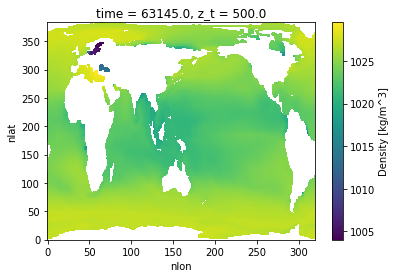

In [5]:
h = rho.isel(time=0, z_t=0).plot()

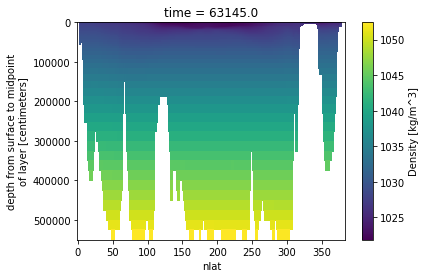

In [6]:
h = rho.isel(time=0, nlon=200).plot(yincrease=False)